# ML-Projekt

Luca Dock - 79768

Maximilian Büchler - 79695

Jonas Blümm - 80640

## Schritt 1 : Trainingsdaten laden

In [31]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

data_raw = pd.read_csv("data/project/train.csv", delimiter=';')
data_raw.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


In [3]:
data_raw.shape

(22400, 5)

## Schritt 2 : EDA

<AxesSubplot: >

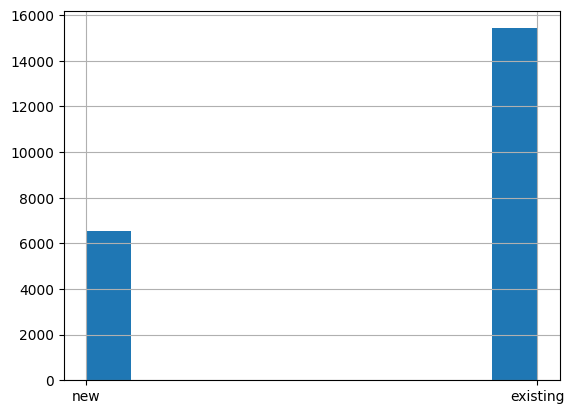

In [4]:
data_raw["customerType"].hist()

<AxesSubplot: >

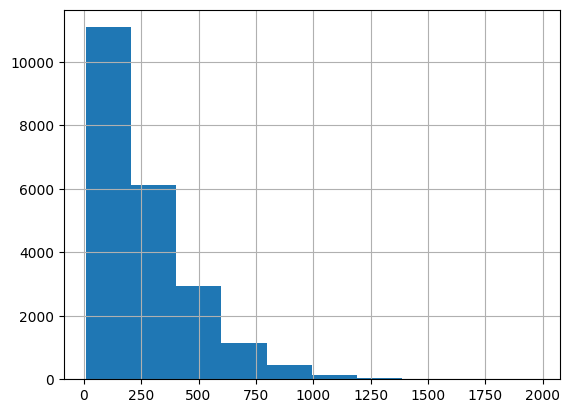

In [5]:
data_raw["totalAmount"].hist()

In [6]:
df_Cust_Existing = data_raw.loc[data_raw["customerType"]=="existing"]
df_Cust_Existing.head()

,transactionId,basket,customerType,totalAmount,returnLabel
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0
5,5023376715,"[3, 1, 3, 4]",existing,80.0,1


In [7]:
df_Cust_New = data_raw.loc[data_raw["customerType"]=="new"]
df_Cust_New.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
9,8428315544,"[2, 0, 3, 2, 3, 1, 4, 1]",new,376.0,0
12,2943511932,"[3, 5, 1, 5, 0, 1]",new,84.0,0
13,1568500392,"[3, 4]",new,204.0,0
15,8222551259,"[3, 4, 3, 4, 4, 0, 1]",new,616.0,1


Verteilung von returnLabel über customerType<br>
Die Verteilung von Zurückschicken bei Neukunden und Altkunden

<AxesSubplot: >

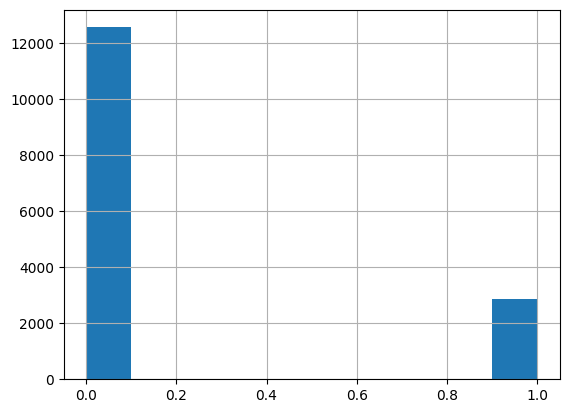

In [8]:
df_Cust_Existing["returnLabel"].hist()

<AxesSubplot: >

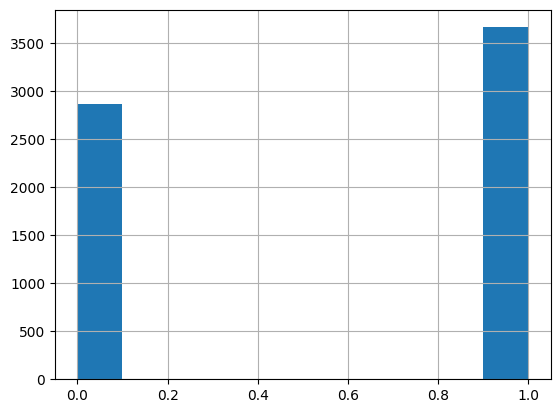

In [9]:
df_Cust_New["returnLabel"].hist()

Boxplot für TotalAmount

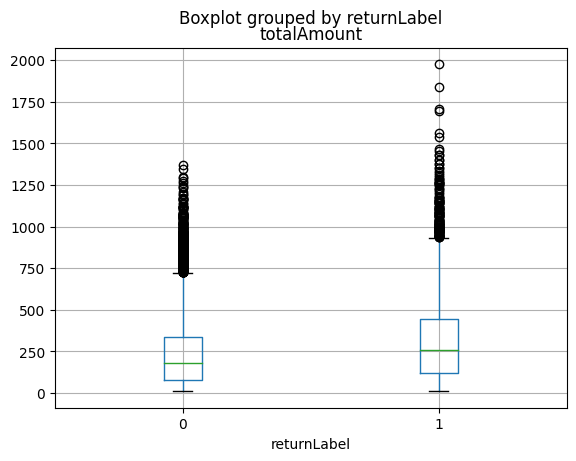

In [10]:
bp = data_raw.boxplot(column="totalAmount",by="returnLabel")


Displot -> x=returnLabel  y=totalAmount

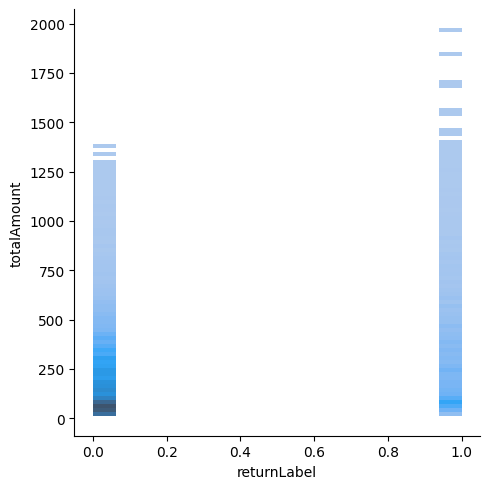

In [11]:
import seaborn as sb
sb.displot(data_raw, x="returnLabel", y="totalAmount")

## Schritt 3

Auffüllen der fehlenden Daten <br>
totalAmount => average<br>
customerType => das was am meisten vorkommt


In [12]:
data_raw.isna().sum()

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64

In [13]:
totalAmount_avg=data_raw["totalAmount"].mean()
data_raw["totalAmount"]=data_raw["totalAmount"].fillna(totalAmount_avg)

In [14]:
df_Cust_Existing.shape

(15426, 5)

In [15]:
df_Cust_New.shape

(6532, 5)

In [16]:
data_raw["customerType"] = data_raw["customerType"].fillna("existing")

In [17]:
data_raw.isna().sum()

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64

## Schritt 4

One-Hot-Encoding
customerType

In [18]:
one_hot_feature_1 = pd.get_dummies(data_raw["customerType"])
one_hot_feature_1.head()

,existing,new
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
data_raw = pd.concat([data_raw, one_hot_feature_1], axis=1)
data_raw.head()

,transactionId,basket,customerType,totalAmount,returnLabel,existing,new
0,9534310106,"[4, 3, 4]",new,252.0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0,1,0
2,2737331698,[5],existing,84.0,0,1,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0,1,0


## Schritt 5

Basket - Features erstellen

In [20]:
def countCat(x,ls):
    arr = ls.replace("[","").replace("]","").replace(" ","").split(",")
    count = 0
    for i in arr:
       if int(i)==int(x):
            count=count+1
    return count

def makeCountFeature(x):
    arr = []
    for i in data_raw["basket"]:
        arr.append(countCat(x, i))
    return arr

for i in range (0,6):
    data_raw[str(i)] = makeCountFeature(i)

data_raw.head(10)

,transactionId,basket,customerType,totalAmount,returnLabel,existing,new,0,1,2,3,4,5
0,9534310106,"[4, 3, 4]",new,252.0,1,0,1,0,0,0,1,2,0
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0,1,0,1,0,2,0,1,1
2,2737331698,[5],existing,84.0,0,1,0,0,0,0,0,0,1
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0,1,0,0,1,1,0,2,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0,1,0,1,0,3,2,0,1
5,5023376715,"[3, 1, 3, 4]",existing,80.0,1,1,0,0,1,0,2,1,0
6,6369326559,"[4, 0, 0, 0, 5, 1]",existing,60.0,0,1,0,3,1,0,0,1,1
7,6726314328,"[2, 4, 4, 4, 4, 2, 4]",existing,616.0,1,1,0,0,0,2,0,5,0
8,3991839024,"[4, 1, 4, 4, 2, 0, 0, 4, 4, 1]",existing,100.0,0,1,0,2,2,1,0,5,0
9,8428315544,"[2, 0, 3, 2, 3, 1, 4, 1]",new,376.0,0,0,1,1,2,2,2,1,0


## Schritt 6

Skallieren der Features

In [24]:
df = data_raw[["totalAmount","existing","new","0","1","2","3","4","5", "returnLabel"]]
df.head(10)

,totalAmount,existing,new,0,1,2,3,4,5,returnLabel
0,252.0,0,1,0,0,0,1,2,0,1
1,70.0,1,0,1,0,2,0,1,1,0
2,84.0,1,0,0,0,0,0,0,1,0
3,116.0,1,0,0,1,1,0,2,0,0
4,378.0,1,0,1,0,3,2,0,1,0
5,80.0,1,0,0,1,0,2,1,0,1
6,60.0,1,0,3,1,0,0,1,1,0
7,616.0,1,0,0,0,2,0,5,0,1
8,100.0,1,0,2,2,1,0,5,0,0
9,376.0,0,1,1,2,2,2,1,0,0


In [32]:
df_X = df.drop(columns=["returnLabel"])
df_y = df["returnLabel"]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

array([[-0.80070496, -1.5553761 ,  1.5553761 , ..., -0.87676803,
        -0.11843979, -0.64531058],
       [ 1.06814442, -1.5553761 ,  1.5553761 , ...,  1.03788991,
        -0.11843979, -0.64531058],
       [-0.13425742,  0.64293131, -0.64293131, ...,  0.08056094,
         2.91578604,  0.52264878],
       ...,
       [-0.78672354,  0.64293131, -0.64293131, ...,  0.08056094,
        -0.87699624, -0.64531058],
       [-0.78206307,  0.64293131, -0.64293131, ...,  0.08056094,
        -0.87699624, -0.64531058],
       [ 1.62740109,  0.64293131, -0.64293131, ..., -0.87676803,
         1.39867313,  1.69060813]])

## Schritt 7

Trainieren mit Cross-Validation per Logistische Regression